In [1]:
import os
import pandas as pd

csv_path = os.path.join("datasets", "spam", "spambase_csv.csv")
spam = pd.read_csv(csv_path)

In [2]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
corrMatrix = spam.corr()
corrMatrix["class"].sort_values(ascending=False)

class                         1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_%24                 0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_%21                 0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

array([[<AxesSubplot: xlabel='class', ylabel='class'>,
        <AxesSubplot: xlabel='word_freq_your', ylabel='class'>,
        <AxesSubplot: xlabel='word_freq_000', ylabel='class'>,
        <AxesSubplot: xlabel='word_freq_remove', ylabel='class'>],
       [<AxesSubplot: xlabel='class', ylabel='word_freq_your'>,
        <AxesSubplot: xlabel='word_freq_your', ylabel='word_freq_your'>,
        <AxesSubplot: xlabel='word_freq_000', ylabel='word_freq_your'>,
        <AxesSubplot: xlabel='word_freq_remove', ylabel='word_freq_your'>],
       [<AxesSubplot: xlabel='class', ylabel='word_freq_000'>,
        <AxesSubplot: xlabel='word_freq_your', ylabel='word_freq_000'>,
        <AxesSubplot: xlabel='word_freq_000', ylabel='word_freq_000'>,
        <AxesSubplot: xlabel='word_freq_remove', ylabel='word_freq_000'>],
       [<AxesSubplot: xlabel='class', ylabel='word_freq_remove'>,
        <AxesSubplot: xlabel='word_freq_your', ylabel='word_freq_remove'>,
        <AxesSubplot: xlabel='word_freq_000'

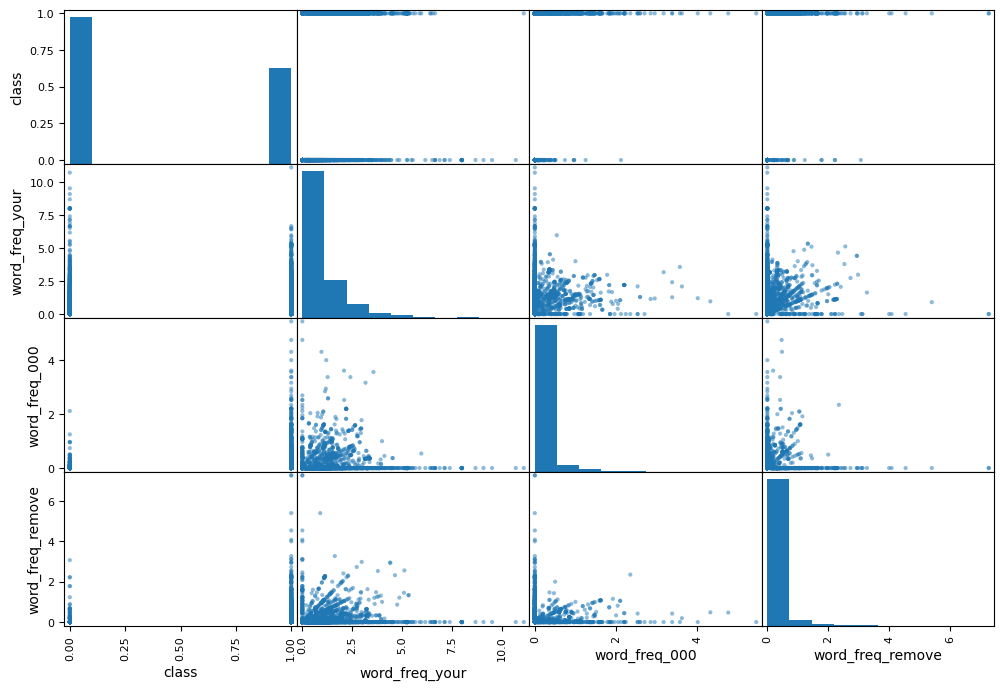

In [4]:
from pandas.plotting import scatter_matrix

#Checando com mais detalhes as relações entre esses atributos
attributes = ["class", "word_freq_your", "word_freq_000", "word_freq_remove"]
scatter_matrix(spam[attributes], figsize=(12,8))

In [5]:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(spam, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [7]:
from sklearn.ensemble import RandomForestRegressor

trainData = trainSet.drop("class", axis=1)
trainLabel = trainSet["class"].copy()
trainDataPrepared = pipeline.fit_transform(trainData)
rfg = RandomForestRegressor()
rfg.fit(trainData, trainLabel)

RandomForestRegressor()

In [8]:
testData = testSet.drop("class", axis=1)
testLabel = testSet["class"].copy()
predict = rfg.predict(testData)
formatedPredict = [round(num) for num in predict] #Arrendondando para ser 0 ou 1
print(formatedPredict)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(testLabel, formatedPredict)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 94.25%
